In [1]:
# Importing the required libraries for analysis
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Reading the properties, train and sample submission dataset
zillow_properties_data_2016 = pd.read_csv("properties_2016.csv", low_memory=False)


In [3]:
# Reading the properties, train and sample submission dataset
#zillow_properties_data_2017 = pd.read_csv("properties_2017.csv", low_memory=False)



In [4]:
# Feature Selection/Removal
# Creating a threshold to remove attributes that are sparse in data
# and removing them from the dataset

threshold = 0.30
zillow_data_feature_removal = zillow_properties_data_2016.copy()
for attr in zillow_properties_data_2016.columns.values.tolist():
    if zillow_properties_data_2016[attr].isnull().sum()/float(zillow_properties_data_2016.shape[0]) > threshold:
        del zillow_data_feature_removal[attr]

zillow_data_feature_removal.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
parcelid,2985217.0,1.332586e+07,7.909966e+06,1.071172e+07,1.164371e+07,1.254509e+07,1.409712e+07,1.696019e+08
bathroomcnt,2973755.0,2.209143e+00,1.077754e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,2973767.0,3.088949e+00,1.275859e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.000000e+01
calculatedbathnbr,2856305.0,2.299263e+00,1.000736e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
calculatedfinishedsquarefeet,2929652.0,1.827162e+03,1.819780e+03,1.000000e+00,1.213000e+03,1.572000e+03,2.136000e+03,9.525760e+05
finishedsquarefeet12,2709184.0,1.760001e+03,9.710610e+02,1.000000e+00,1.196000e+03,1.539000e+03,2.070000e+03,2.903450e+05
fips,2973780.0,6.048032e+03,2.023278e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
fullbathcnt,2856305.0,2.244165e+00,9.912054e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
latitude,2973780.0,3.400147e+07,2.433812e+05,3.332439e+07,3.382768e+07,3.400825e+07,3.416186e+07,3.481965e+07
longitude,2973780.0,-1.182019e+08,3.453171e+05,-1.194758e+08,-1.183930e+08,-1.181725e+08,-1.179495e+08,-1.175543e+08


In [5]:
# fips Federal Information Processing Standard code is the same for most of the data
del zillow_data_feature_removal['fips']


# bathroomcnt is the same as calculatedbathnbr and fullbathcnt, Hence we retain bathroomcnt and delete the other 2 
del zillow_data_feature_removal['calculatedbathnbr']
del zillow_data_feature_removal['fullbathcnt']


# calculatedfinishedsquarefeet and finishedsquarefeet12 are similar, 
# and calcuatedfinishedsqarefeet might be more accurate and one of them can be removed
del zillow_data_feature_removal['finishedsquarefeet12']


# Removing redundant data censustractandblock (similar to rawcensustractandblock)
# Census data contains information about location i.e. block and district which 
# can be obtained from regionidzip.
del zillow_data_feature_removal['censustractandblock']
del zillow_data_feature_removal['rawcensustractandblock']


# Removing propertycountylandusecode as the categorical attribute propertylandusetypeid 
# provides same information
del zillow_data_feature_removal['propertycountylandusecode']
del zillow_data_feature_removal['assessmentyear']
del zillow_data_feature_removal['roomcnt']


In [6]:
zillow_data_feature_removal.columns



Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'latitude', 'longitude', 'lotsizesquarefeet', 'propertylandusetypeid',
       'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount'],
      dtype='object')

In [7]:
#Creating a data frame to calculate noise that can be used to fill lotsizesquarefeet and calculatedfinishedsquarefeet
squareFeetCols= {'calculatedfinishedsquarefeet':zillow_data_feature_removal['calculatedfinishedsquarefeet'],'lotsizesquarefeet':zillow_data_feature_removal['lotsizesquarefeet']}
squareFeetdfWithoutNaN = pd.DataFrame(squareFeetCols)


In [8]:
#Dropping the rows with NaN values
squareFeetdfWithoutNaN=squareFeetdfWithoutNaN.dropna(how='any')

# creating a new column 'difference' which tracks diff between lotsizesquarefeet - calculatedfinishedsquarefeet
squareFeetdfWithoutNaN['difference']= squareFeetdfWithoutNaN['lotsizesquarefeet']-squareFeetdfWithoutNaN['calculatedfinishedsquarefeet']

# keeping only the values with greater lotsizesquarefeet than calculatedfinishedsquarefeet
squareFeetdfWithoutNaN=squareFeetdfWithoutNaN[squareFeetdfWithoutNaN['difference']>0]

squareFeetdfWithoutNaN['differenceFraction']= squareFeetdfWithoutNaN['difference'] / squareFeetdfWithoutNaN['lotsizesquarefeet']         

# calculating the mean of differenceFraction column
noise=squareFeetdfWithoutNaN['differenceFraction'].mean()
noise

0.7488919009507046

In [9]:
# Filling NAN values in calculatedfinishedsquarefeet and lotsizesquarefeet by using noise
zillow_data_feature_removal['calculatedfinishedsquarefeet'].loc[zillow_data_feature_removal['calculatedfinishedsquarefeet'].isnull()]=(1-noise)*zillow_data_feature_removal['lotsizesquarefeet'].loc[zillow_data_feature_removal['lotsizesquarefeet'].notnull()] 
zillow_data_feature_removal['lotsizesquarefeet'].loc[zillow_data_feature_removal['lotsizesquarefeet'].isnull()]=zillow_data_feature_removal['calculatedfinishedsquarefeet'].loc[zillow_data_feature_removal['calculatedfinishedsquarefeet'].notnull()]/(1-noise)



/Users/yashunavetia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
# filling the Remaining NAN values in calculatedfinishedsquarefeet and lotsizesquarefeet with mean and median

zillow_data_feature_removal['calculatedfinishedsquarefeet']=zillow_data_feature_removal['calculatedfinishedsquarefeet'].fillna(zillow_data_feature_removal['calculatedfinishedsquarefeet'].mean())

zillow_data_feature_removal['lotsizesquarefeet']=zillow_data_feature_removal['lotsizesquarefeet'].fillna(zillow_data_feature_removal['lotsizesquarefeet'].median())

In [11]:
# filling landtaxvaluedollarcnt and structuretaxvaluedollarcnt by using the computation taxvaluedollarcnt=landtaxvaluedollarcnt+structuretaxvaluedollarcnt

zillow_data_feature_removal['landtaxvaluedollarcnt'].loc[zillow_data_feature_removal['landtaxvaluedollarcnt'].isnull()]= zillow_data_feature_removal['taxvaluedollarcnt'].loc[zillow_data_feature_removal['taxvaluedollarcnt'].notnull()]-zillow_data_feature_removal['structuretaxvaluedollarcnt'].loc[zillow_data_feature_removal['structuretaxvaluedollarcnt'].notnull()] 
zillow_data_feature_removal['structuretaxvaluedollarcnt'].loc[zillow_data_feature_removal['structuretaxvaluedollarcnt'].isnull()]= zillow_data_feature_removal['taxvaluedollarcnt'].loc[zillow_data_feature_removal['taxvaluedollarcnt'].notnull()]-zillow_data_feature_removal['landtaxvaluedollarcnt'].loc[zillow_data_feature_removal['landtaxvaluedollarcnt'].notnull()] 





/Users/yashunavetia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
# filling longitude , latitude , yearbuilt, bathroomcnt, bedroomcnt 
zillow_data_feature_removal['latitude']=zillow_data_feature_removal['latitude'].fillna(zillow_data_feature_removal['latitude'].mean())

zillow_data_feature_removal['longitude']=zillow_data_feature_removal['longitude'].fillna(zillow_data_feature_removal['longitude'].mean())

zillow_data_feature_removal['yearbuilt']=zillow_data_feature_removal['yearbuilt'].fillna(zillow_data_feature_removal['yearbuilt'].median())

zillow_data_feature_removal['bathroomcnt']=zillow_data_feature_removal['bathroomcnt'].fillna(zillow_data_feature_removal['bathroomcnt'].median())

zillow_data_feature_removal['bedroomcnt']=zillow_data_feature_removal['bedroomcnt'].fillna(zillow_data_feature_removal['bedroomcnt'].median())

In [13]:
region_city_unique = dict()
max_regions = len(zillow_data_feature_removal["regionidcity"].unique())-1
row = 0
while max_regions:
    if (not (zillow_data_feature_removal.get_value(row,"regionidcity") in region_city_unique)) and not np.isnan(zillow_data_feature_removal.get_value(row,"regionidcity")):
        max_regions -= 1
        region_city_unique[int(zillow_data_feature_removal.get_value(row,"regionidcity"))] = [zillow_data_feature_removal.get_value(row,"latitude")/1000000.0, zillow_data_feature_removal.get_value(row,"longitude")/1000000.0]
    row += 1    
    

In [14]:
#from pygeocoder import Geocoder
#region_city_county = dict()
#for city in region_city_unique.keys():
#    location = Geocoder.reverse_geocode(region_city_unique[city][0],region_city_unique[city][1])
#    region_city_county[city] = [location.city, location.county, location.postal_code]
region_city_county = {37688: ['Calabasas', 'Los Angeles County', '91302'], 51617: ['Culver City', 'Los Angeles County', '90230'], 12447: ['Los Angeles', 'Los Angeles County', '91423'], 396054: ['Burbank', 'Los Angeles County', '91502'], 47547: ['San Fernando', 'Los Angeles County', '91340'], 54311: ['Santa Clarita', 'Los Angeles County', '91350'], 40227: ['Palmdale', 'Los Angeles County', '93551'], 5534: ['Lancaster', 'Los Angeles County', '93534'], 45888: ['Inglewood', 'Los Angeles County', '90305'], 33612: ['Redondo Beach', 'Los Angeles County', '90278'], 26964: ['Santa Monica', 'Los Angeles County', '90405'], 17882: ['Los Angeles', 'Los Angeles County', '90063'], 25953: ['Montebello', 'Los Angeles County', '90640'], 33837: ['San Gabriel', 'Los Angeles County', '91776'], 48424: ['West Hollywood', 'Los Angeles County', '90069'], 45457: ['Glendale', 'Los Angeles County', '91202'], 47019: ['Pasadena', 'Los Angeles County', '91103'], 50749: ['Arcadia', 'Los Angeles County', '91007'], 30187: ['Altadena', 'Los Angeles County', '91001'], 118994: ['Los Angeles', 'Los Angeles County', '90061'], 47762: ['South Gate', 'Los Angeles County', '90280'], 6395: ['Paramount', 'Los Angeles County', '90723'], 39076: ['Huntington Park', 'Los Angeles County', '90255'], 16961: ['Bell Gardens', 'Los Angeles County', '90201'], 10774: ['Cerritos', 'Los Angeles County', '90703'], 46298: ['Long Beach', 'Los Angeles County', '90805'], 44116: ['Bellflower', 'Los Angeles County', '90706'], 27103: ['Signal Hill', 'Los Angeles County', '90755'], 54722: ['Torrance', 'Los Angeles County', '90503'], 53027: ['Lomita', 'Los Angeles County', '90717'], 33311: ['Palos Verdes Estates', 'Los Angeles County', '90274'], 13716: ['Santa Fe Springs', 'Los Angeles County', '90670'], 53636: ['Norwalk', 'Los Angeles County', '90650'], 14634: ['Whittier', 'Los Angeles County', '90601'], 39306: ['La Puente', 'Los Angeles County', '91744'], 20008: ['Pomona', 'Los Angeles County', '91768'], 51861: ['El Monte', 'Los Angeles County', '91731'], 11626: ['Glendora', 'Los Angeles County', '91741'], 53162: ['Marina del Rey', 'Los Angeles County', '90292'], 113576: ['City of Industry', 'Los Angeles County', '91746'], 24384: ['Diamond Bar', 'Los Angeles County', '91789'], 26483: ['Pico Rivera', 'Los Angeles County', '90660'], 12520: ['Malibu', 'Los Angeles County', '90265'], 118217: ['La Puente', 'Los Angeles County', '91744'], 54212: ['Rosemead', 'Los Angeles County', '91770'], 45398: ['Gardena', 'Los Angeles County', '90247'], 24174: ['Compton', 'Los Angeles County', '90220'], 30267: ['Artesia', 'Los Angeles County', '90701'], 21778: ['Hawaiian Gardens', 'Los Angeles County', '90716'], 10723: ['Carson', 'Los Angeles County', '90746'], 118878: ['Torrance', 'Los Angeles County', '90502'], 22827: ['Rowland Heights', 'Los Angeles County', '91748'], 5465: ['La Mirada', 'Los Angeles County', '90638'], 36502: ['South El Monte', 'Los Angeles County', '91733'], 45602: ['La Puente', 'Los Angeles County', '91746'], 39308: ['La Verne', 'Los Angeles County', '91750'], 33836: ['San Dimas', 'Los Angeles County', '91773'], 24245: ['Glendora', 'Los Angeles County', '91740'], 32923: ['Monrovia', 'Los Angeles County', '91016'], 37015: ['Azusa', 'Los Angeles County', '91702'], 24812: ['Fullerton', 'Orange County', '92832'], 34780: ['Westminster', 'Orange County', '92683'], 52650: ['Irvine', 'Orange County', '92620'], 46314: ['Los Alamitos', 'Orange County', '90720'], 15554: ['Ladera Ranch', 'Orange County', '92694'], 33840: ['Ladera Ranch', 'Orange County', '92694'], 47568: ['Santa Ana', 'Orange County', '92703'], 42967: ['Stanton', 'Orange County', '90680'], 27491: ['Tustin', 'Orange County', '92780'], 16764: ['Anaheim', 'Orange County', '92804'], 26531: ['Placentia', 'Orange County', '92870'], 25218: ['Huntington Beach', 'Orange County', '92649'], 32380: ['Lake Forest', 'Orange County', '92610'], 53571: ['Newport Beach', 'Orange County', '92660'], 17150: ['Brea', 'Orange County', '92823'], 13091: ['Ojai', 'Ventura County', '93023'], 26965: ['Santa Paula', 'Ventura County', '93060'], 27110: ['Simi Valley', 'Ventura County', '93063'], 34278: ['Thousand Oaks', 'Ventura County', '91362'], 34543: ['Ventura', 'Ventura County', '93003'], 13150: ['Oxnard', 'Ventura County', '93033'], 40110: ['Ojai', 'Ventura County', '93023'], 18098: ['Fillmore', 'Ventura County', '93015'], 13311: ['Piru', 'Ventura County', '93040'], 51239: ['Camarillo', 'Ventura County', '93010'], 34037: ['Somis', 'Ventura County', '93066'], 47198: ['Port Hueneme', 'Ventura County', '93041'], 25974: ['Moorpark', 'Ventura County', '93021'], 41673: ['Westlake Village', 'Ventura County', '91361'], 53655: ['Oak Park', 'Ventura County', '91377'], 42091: ['Bell Canyon', 'Ventura County', '91307'], 9840: ['Agoura Hills', 'Los Angeles County', '91301'], 38980: ['Hidden Hills', 'Los Angeles County', '91302'], 10734: ['Castaic', 'Los Angeles County', '91384'], 29189: ['Palmdale', 'Los Angeles County', '93591'], 13232: ['Pearblossom', 'Los Angeles County', '93553'], 16677: ['Palmdale', 'Los Angeles County', '93550'], 25621: ['Pearblossom', 'Los Angeles County', '93553'], 25468: ['Lake Hughes', 'Los Angeles County', '93532'], 116042: ['Los Angeles', 'Los Angeles County', '90056'], 396550: ['View Park-Windsor Hills', 'Los Angeles County', '90056'], 42150: ['Hawthorne', 'Los Angeles County', '90250'], 118875: ['Los Angeles', 'Los Angeles County', '90047'], 113412: ['Gardena', 'Los Angeles County', '90249'], 46178: ['Lawndale', 'Los Angeles County', '90260'], 55753: ['El Segundo', 'Los Angeles County', '90245'], 19177: ['Manhattan Beach', 'Los Angeles County', '90266'], 29712: ['Hermosa Beach', 'Los Angeles County', '90254'], 10389: ['Beverly Hills', 'Los Angeles County', '90212'], 56780: ['Topanga', 'Los Angeles County', '90290'], 6021: ['Monterey Park', 'Los Angeles County', '91754'], 272578: ['Commerce', 'Los Angeles County', '90040'], 50677: ['Alhambra', 'Los Angeles County', '91801'], 27183: ['South Pasadena', 'Los Angeles County', '91030'], 54299: ['San Marino', 'Los Angeles County', '91108'], 114834: ['Pasadena', 'Los Angeles County', '91107'], 14111: ['Temple City', 'Los Angeles County', '91780'], 396551: ['Glendale', 'Los Angeles County', '91214'], 47695: ['Sierra Madre', 'Los Angeles County', '91024'], 46080: ['La Cañada Flintridge', 'Los Angeles County', '91011'], 396053: ['Los Angeles', 'Los Angeles County', '90001'], 118914: ['Los Angeles', 'Los Angeles County', '90044'], 118880: ['Gardena', 'Los Angeles County', '90248'], 32616: ['Lynwood', 'Los Angeles County', '90262'], 31134: ['Cudahy', 'Los Angeles County', '90201'], 30399: ['Bell', 'Los Angeles County', '90201'], 4406: ['Downey', 'Los Angeles County', '90241'], 32753: ['Maywood', 'Los Angeles County', '90270'], 15237: ['Cerritos', 'Los Angeles County', '90703'], 12292: ['Lakewood', 'Los Angeles County', '90713'], 44833: ['Cypress', 'Orange County', '90630'], 54352: ['Long Beach', None, '90803'], 3491: ['Avalon', 'Los Angeles County', '90704'], 54053: ['Rancho Palos Verdes', 'Los Angeles County', '90275'], 33727: ['Rolling Hills Estates', 'Los Angeles County', '90274'], 6822: ['Palos Verdes Estates', 'Los Angeles County', '90274'], 33312: ['Palos Verdes Peninsula', 'Los Angeles County', '90274'], 118225: ['Whittier', 'Los Angeles County', '90605'], 114828: ['Whittier', 'Los Angeles County', '90604'], 18874: ['La Habra', 'Orange County', '90631'], 396556: ['Whittier', 'Los Angeles County', '90606'], 118895: ['La Puente', 'Los Angeles County', '91744'], 18875: ['La Habra Heights', 'Los Angeles County', '90631'], 118694: ['La Puente', 'Los Angeles County', '91744'], 14542: ['West Covina', 'Los Angeles County', '91792'], 30908: ['Claremont', 'Los Angeles County', '91711'], 25271: ['Irwindale', 'Los Angeles County', '91706'], 10241: ['Baldwin Park', 'Los Angeles County', '91706'], 14906: ['Monrovia', 'Los Angeles County', '91016'], 24435: ['Bradbury', 'Los Angeles County', '91008'], 34636: ['Walnut', 'Los Angeles County', '91789'], 33252: ['Orange', 'Orange County', '92868'], 52842: ['Laguna Beach', 'Orange County', '92651'], 13693: ['San Clemente', 'Orange County', '92672'], 10608: ['Buena Park', 'Orange County', '90621'], 24832: ['Garden Grove', 'Orange County', '92840'], 40081: ['Santa Ana', 'Orange County', '92705'], 16389: ['Silverado', 'Orange County', '92676'], 8384: ['Westminster', 'Orange County', '92683'], 38032: ['Costa Mesa', 'Orange County', '92627'], 21412: ['Yorba Linda', 'Orange County', '92886'], 54970: ['Villa Park', 'Orange County', '92861'], 40009: ['Newport Beach', 'Orange County', '92660'], 25458: ['Laguna Hills', 'Orange County', '92653'], 12773: ['Mission Viejo', 'Orange County', '92691'], 37086: ['Laguna Hills', 'Orange County', '92656'], 25459: ['Laguna Niguel', 'Orange County', '92677'], 17686: ['San Juan Capistrano', 'Orange County', '92675'], 17597: ['Coto de Caza', 'Orange County', '92679'], 46098: ['Laguna Woods', 'Orange County', '92653'], 52835: ['Ladera Ranch', 'Orange County', '92694'], 21395: ['Llano', 'Los Angeles County', '93544'], 41484: ['Vernon', 'Los Angeles County', '90058'], 32927: ['Montclair', 'San Bernardino County', '91763'], 10815: ['Chino Hills', 'San Bernardino County', '91709'], 25535: ['Lebec', 'Los Angeles County', '93243'], 27512: ['Upland', 'Los Angeles County', '91786'], 6285: ['San Clemente', 'San Diego County', '92672'], 24797: ['Frazier Park', 'Ventura County', '93225'], 40633: ['Rosamond', 'Los Angeles County', '93560'], 48211: ['Valyermo', 'Los Angeles County', '93563'], 3980: ['Carpinteria', 'Santa Barbara County', '93013'], 37882: ['City of Industry', 'Los Angeles County', '91745'], 47913: ['Huntington Beach', 'Orange County', '90742'], 36078: ['Llano', 'Los Angeles County', '93544'], 19202: ['Frazier Park', 'Ventura County', '93225']}   

In [15]:
# Using external dataset
# The 2010 US Census Population By Zip Code
# https://blog.splitwise.com/2013/09/18/the-2010-us-census-population-by-zip-code-totally-free/
# Population Growth rate from 2010 to 2016 is 5.16%

census_2010_data = pd.read_csv("population_2010.csv", low_memory=False)



In [16]:
region_zip_code_population = dict()
for c in region_city_county:
    region_zip_code_population[region_city_county[c][2]] = census_2010_data.get_value(census_2010_data.loc[census_2010_data['Zip Code ZCTA'] == int(region_city_county[c][2])].index[0], '2010 Census Population' ) 


In [17]:
region_county = set([region_city_county[k][1] for k in region_city_county.keys()])
region_county



{'Santa Barbara County',
 'San Diego County',
 'Ventura County',
 'Los Angeles County',
 'San Bernardino County',
 'Orange County',
 None}

In [18]:
region_county_tax_rates = {"Orange":0.715, "Los Angeles":0.793, "Santa Barbara":0.698, "San Bernardino":0.92, "San Diego":0.781, "Ventura":0.801}




In [19]:
zillow_data_preprocessing = zillow_data_feature_removal.copy()

In [20]:
lat_max = zillow_data_preprocessing.groupby("regionidzip")["latitude"].max().reset_index()

In [21]:
region_zip_latitude_longitude_ranges = dict()
for z in zillow_data_feature_removal["regionidzip"].unique():
    region_zip_latitude_longitude_ranges[z] = [[0,0],[0,0]]

#Creating a dictionary for latitude and longitude ranges    
lat_max = zillow_data_preprocessing.groupby("regionidzip")["latitude"].max().reset_index()
for i in range(len(lat_max["regionidzip"])):
    region_zip_latitude_longitude_ranges[lat_max["regionidzip"][i]][0][1] = lat_max["latitude"][i]
    
lat_min = zillow_data_preprocessing.groupby("regionidzip")["latitude"].min().reset_index()
for i in range(len(lat_min["regionidzip"])):
    region_zip_latitude_longitude_ranges[lat_min["regionidzip"][i]][0][0] = lat_min["latitude"][i]
    
long_max = zillow_data_preprocessing.groupby("regionidzip")["longitude"].max().reset_index()
for i in range(len(long_max["regionidzip"])):
    region_zip_latitude_longitude_ranges[long_max["regionidzip"][i]][1][1] = long_max["longitude"][i]

long_min = zillow_data_preprocessing.groupby("regionidzip")["longitude"].min().reset_index()
for i in range(len(long_min["regionidzip"])):
    region_zip_latitude_longitude_ranges[long_min["regionidzip"][i]][1][0] = long_min["longitude"][i]

In [22]:
def find_region_zip_for_lat_long(region_zip_latitude_longitude_ranges, latitude, longitude):
    for k in region_zip_latitude_longitude_ranges.keys():
        if latitude<=region_zip_latitude_longitude_ranges[k][0][1] and latitude>=region_zip_latitude_longitude_ranges[k][0][0] and longitude<=region_zip_latitude_longitude_ranges[k][1][1] and longitude>=region_zip_latitude_longitude_ranges[k][1][0]:
            return k

for i in range(zillow_data_feature_removal.shape[0]):
    if np.isnan(zillow_data_feature_removal.iloc[i]["regionidzip"]):
        zillow_data_feature_removal.at[i,"regionidzip"] = find_region_zip_for_lat_long(region_zip_latitude_longitude_ranges, zillow_data_feature_removal.iloc[i]["latitude"], zillow_data_feature_removal.iloc[i]["longitude"])


In [23]:
zillow_data_feature_removal['regionidzip']=zillow_data_feature_removal['regionidzip'].fillna(zillow_data_feature_removal['regionidzip'].median())

In [24]:
tax_median = zillow_data_feature_removal.groupby("regionidzip")["taxamount","structuretaxvaluedollarcnt","landtaxvaluedollarcnt"].median().reset_index()

In [27]:
zipcode_tax = dict()
for i in range(tax_median.shape[0]):
    zipcode_tax[tax_median.iloc[i]["regionidzip"]] = [0,0,0]

for i in range(tax_median.shape[0]):
    zipcode_tax[tax_median.iloc[i]["regionidzip"]][0] = tax_median.iloc[i]["taxamount"]
    zipcode_tax[tax_median.iloc[i]["regionidzip"]][1] = tax_median.iloc[i]["structuretaxvaluedollarcnt"]
    zipcode_tax[tax_median.iloc[i]["regionidzip"]][2] = tax_median.iloc[i]["landtaxvaluedollarcnt"]

In [28]:
for i in range(zillow_data_feature_removal.shape[0]):
    if np.isnan(zillow_data_feature_removal.iloc[i]["taxamount"]):
        zillow_data_feature_removal.at[i,"taxamount"] = zipcode_tax[zillow_data_feature_removal.iloc[i]["regionidzip"]][0]
    if np.isnan(zillow_data_feature_removal.iloc[i]["structuretaxvaluedollarcnt"]):
        zillow_data_feature_removal.at[i,"structuretaxvaluedollarcnt"] = zipcode_tax[zillow_data_feature_removal.iloc[i]["regionidzip"]][1]
    if np.isnan(zillow_data_feature_removal.iloc[i]["landtaxvaluedollarcnt"]):
        zillow_data_feature_removal.at[i,"landtaxvaluedollarcnt"] = zipcode_tax[zillow_data_feature_removal.iloc[i]["regionidzip"]][2] 
        
        

In [29]:
zillow_data_feature_removal['taxamount']=zillow_data_feature_removal['taxamount'].fillna(zillow_data_feature_removal['taxamount'].median())



In [30]:
# creating a dict with unique region zip ids
region_zip_unique = dict()
max_zips = len(zillow_data_feature_removal["regionidzip"].unique())
row = 0
while max_zips:
    if (not (zillow_data_feature_removal.get_value(row,"regionidzip") in region_zip_unique)) and not np.isnan(zillow_data_feature_removal.get_value(row,"regionidzip")):
        max_zips -= 1
        region_zip_unique[int(zillow_data_feature_removal.get_value(row,"regionidzip"))] = [zillow_data_feature_removal.get_value(row,"latitude")/1000000.0, zillow_data_feature_removal.get_value(row,"longitude")/1000000.0]
    row += 1
print(len(region_zip_unique))
    

405


In [31]:
# creating mapping between regionidzip abd city,county,postal code
# 
# from pygeocoder import Geocoder
# region_zip_county = dict()
# for city in region_zip_unique.keys():
#    location = Geocoder.reverse_geocode(region_zip_unique[city][0],region_zip_unique[city][1])
#    region_zip_county[city] = [location.city, location.county, location.postal_code]
region_zip_county = {96337: ['Calabasas', 'Los Angeles County', '91302'], 96095: ['Culver City', 'Los Angeles County', '90230'], 96424: ['Los Angeles', 'Los Angeles County', '91423'], 96450: ['Los Angeles', 'Los Angeles County', '91605'], 96446: ['Los Angeles', 'Los Angeles County', '91601'], 96049: ['Los Angeles', 'Los Angeles County', '90068'], 96434: ['Burbank', 'Los Angeles County', '91502'], 96436: ['Burbank', 'Los Angeles County', '91504'], 96366: ['San Fernando', 'Los Angeles County', '91340'], 96370: ['Los Angeles', 'Los Angeles County', '91344'], 96377: ['Santa Clarita', 'Los Angeles County', '91354'], 96373: ['Santa Clarita', 'Los Angeles County', '91350'], 97329: ['Palmdale', 'Los Angeles County', '93551'], 97330: ['Palmdale', 'Los Angeles County', '93552'], 97317: ['Lancaster', 'Los Angeles County', '93534'], 97318: ['Lancaster', 'Los Angeles County', '93534'], 96024: ['Los Angeles', 'Los Angeles County', '90043'], 96137: ['Inglewood', 'Los Angeles County', '90305'], 96133: ['Inglewood', 'Los Angeles County', '90301'], 96136: ['Inglewood', 'Los Angeles County', '90304'], 96026: ['Los Angeles', 'Los Angeles County', '90045'], 96124: ['Redondo Beach', 'Los Angeles County', '90278'], 96097: ['Culver City', 'Los Angeles County', '90232'], 96072: ['Los Angeles', 'Los Angeles County', '90094'], 96047: ['Los Angeles', 'Los Angeles County', '90066'], 96149: ['Santa Monica', 'Los Angeles County', '90402'], 96152: ['Santa Monica', 'Los Angeles County', '90405'], 96148: ['Santa Monica', 'Los Angeles County', '90401'], 96045: ['Los Angeles', 'Los Angeles County', '90064'], 96005: ['Los Angeles', 'Los Angeles County', '90024'], 96030: ['Los Angeles', 'Los Angeles County', '90049'], 96043: ['Los Angeles', 'Los Angeles County', '90062'], 95987: ['Los Angeles', 'Los Angeles County', '90007'], 96000: ['Los Angeles', 'Los Angeles County', '90019'], 96017: ['Los Angeles', 'Los Angeles County', '90036'], 96018: ['Los Angeles', 'Los Angeles County', '90037'], 95996: ['Los Angeles', 'Los Angeles County', '90017'], 96038: ['Los Angeles', 'Los Angeles County', '90057'], 96012: ['Los Angeles', 'Los Angeles County', '90031'], 96013: ['Los Angeles', 'Los Angeles County', '90032'], 96044: ['Los Angeles', 'Los Angeles County', '90063'], 96004: ['Los Angeles', 'Los Angeles County', '90023'], 96192: ['Montebello', 'Los Angeles County', '90640'], 96515: ['San Gabriel', 'Los Angeles County', '91776'], 96007: ['Los Angeles', 'Los Angeles County', '90026'], 95993: ['Los Angeles', 'Los Angeles County', '90012'], 96020: ['Los Angeles', 'Los Angeles County', '90039'], 96046: ['Los Angeles', 'Los Angeles County', '90065'], 96023: ['Los Angeles', 'Los Angeles County', '90042'], 96009: ['Los Angeles', 'Los Angeles County', '90028'], 96050: ['West Hollywood', 'Los Angeles County', '90069'], 96008: ['Los Angeles', 'Los Angeles County', '90027'], 96321: ['Glendale', 'Los Angeles County', '91202'], 96325: ['Glendale', 'Los Angeles County', '91206'], 96291: ['Pasadena', 'Los Angeles County', '91103'], 96289: ['Pasadena', 'Los Angeles County', '91101'], 96268: ['Arcadia', 'Los Angeles County', '91007'], 96265: ['Altadena', 'Los Angeles County', '91001'], 96292: ['Pasadena', 'Los Angeles County', '91104'], 95984: ['Los Angeles', 'Los Angeles County', '90003'], 96025: ['Los Angeles', 'Los Angeles County', '90044'], 96028: ['Los Angeles', 'Los Angeles County', '90047'], 96042: ['Los Angeles', 'Los Angeles County', '90061'], 96104: ['Gardena', 'Los Angeles County', '90247'], 96125: ['South Gate', 'Los Angeles County', '90280'], 96220: ['Paramount', 'Los Angeles County', '90723'], 96110: ['Huntington Park', 'Los Angeles County', '90255'], 96083: ['Bell Gardens', 'Los Angeles County', '90201'], 96003: ['East Los Angeles', 'Los Angeles County', '90022'], 96206: ['Cerritos', 'Los Angeles County', '90703'], 96239: ['Long Beach', 'Los Angeles County', '90805'], 96208: ['Bellflower', 'Los Angeles County', '90706'], 96234: ['Signal Hill', 'Los Angeles County', '90755'], 96246: ['Long Beach', 'Los Angeles County', '90814'], 96245: ['Long Beach', 'Los Angeles County', '90813'], 96236: ['Long Beach', 'Los Angeles County', '90802'], 96159: ['Torrance', 'Los Angeles County', '90501'], 96161: ['Torrance', 'Los Angeles County', '90503'], 96217: ['Lomita', 'Los Angeles County', '90717'], 96221: ['Los Angeles', 'Los Angeles County', '90731'], 96123: ['Redondo Beach', 'Los Angeles County', '90277'], 96163: ['Torrance', 'Los Angeles County', '90505'], 96121: ['Palos Verdes Estates', 'Los Angeles County', '90274'], 96201: ['Santa Fe Springs', 'Los Angeles County', '90670'], 96193: ['Norwalk', 'Los Angeles County', '90650'], 96169: ['Whittier', 'Los Angeles County', '90601'], 96488: ['La Puente', 'Los Angeles County', '91744'], 96508: ['Pomona', 'Los Angeles County', '91768'], 96478: ['El Monte', 'Los Angeles County', '91731'], 96486: ['Glendora', 'Los Angeles County', '91741'], 96485: ['Glendora', 'Los Angeles County', '91740'], 96506: ['Pomona', 'Los Angeles County', '91766'], 96128: ['Marina del Rey', 'Los Angeles County', '90292'], 96364: ['Los Angeles', 'Los Angeles County', '91335'], 96415: ['Los Angeles', 'Los Angeles County', '91406'], 96490: ['City of Industry', 'Los Angeles County', '91746'], 96368: ['Los Angeles', 'Los Angeles County', '91342'], 96361: ['Los Angeles', 'Los Angeles County', '91331'], 96371: ['Los Angeles', 'Los Angeles County', '91345'], 96346: ['Los Angeles', 'Los Angeles County', '91311'], 96339: ['Los Angeles', 'Los Angeles County', '91304'], 96354: ['Los Angeles', 'Los Angeles County', '91324'], 96374: ['Santa Clarita', 'Los Angeles County', '91351'], 96352: ['Santa Clarita', 'Los Angeles County', '91321'], 96401: ['Santa Clarita', 'Los Angeles County', '91387'], 97328: ['Palmdale', 'Los Angeles County', '93550'], 97319: ['Lancaster', 'Los Angeles County', '93536'], 96522: ['Diamond Bar', 'Los Angeles County', '91789'], 96197: ['Pico Rivera', 'Los Angeles County', '90660'], 96116: ['Malibu', 'Los Angeles County', '90265'], 96510: ['Rosemead', 'Los Angeles County', '91770'], 96237: ['Long Beach', 'Los Angeles County', '90803'], 96090: ['Compton', 'Los Angeles County', '90220'], 96204: ['Artesia', 'Los Angeles County', '90701'], 96216: ['Hawaiian Gardens', 'Los Angeles County', '90716'], 96091: ['Compton', 'Los Angeles County', '90221'], 96244: ['Long Beach', 'Los Angeles County', '90810'], 96230: ['Carson', 'Los Angeles County', '90746'], 96229: ['Carson', 'Los Angeles County', '90745'], 96160: ['Torrance', 'Los Angeles County', '90502'], 96210: ['West Carson', 'Los Angeles County', '90710'], 96228: ['Los Angeles', 'Los Angeles County', '90744'], 96222: ['Los Angeles', 'Los Angeles County', '90732'], 96492: ['Rowland Heights', 'Los Angeles County', '91748'], 96190: ['La Mirada', 'Los Angeles County', '90638'], 96480: ['South El Monte', 'Los Angeles County', '91733'], 96479: ['El Monte', 'Los Angeles County', '91732'], 96489: ['La Puente', 'Los Angeles County', '91746'], 96507: ['Pomona', 'Los Angeles County', '91767'], 96494: ['La Verne', 'Los Angeles County', '91750'], 96513: ['San Dimas', 'Los Angeles County', '91773'], 96475: ['Glendora', 'Los Angeles County', '91740'], 96473: ['Covina', 'Los Angeles County', '91722'], 96273: ['Monrovia', 'Los Angeles County', '91016'], 96464: ['Azusa', 'Los Angeles County', '91702'], 96040: ['Los Angeles', 'Los Angeles County', '90059'], 97040: ['Fullerton', 'Orange County', '92832'], 96990: ['Westminster', 'Orange County', '92683'], 96954: ['Irvine', 'Orange County', '92620'], 96218: ['Los Alamitos', 'Orange County', '90720'], 96959: ['Costa Mesa', 'Orange County', '92627'], 96947: ['Irvine', 'Orange County', '92612'], 96952: ['Irvine', 'Orange County', '92618'], 96998: ['Ladera Ranch', 'Orange County', '92694'], 97003: ['Santa Ana', 'Orange County', '92703'], 96203: ['Stanton', 'Orange County', '90680'], 97016: ['Tustin', 'Orange County', '92780'], 97023: ['Anaheim', 'Orange County', '92804'], 97068: ['Placentia', 'Orange County', '92870'], 96967: ['Huntington Beach', 'Orange County', '92649'], 97067: ['Irvine', 'Orange County', '92602'], 96962: ['Lake Forest', 'Orange County', '92610'], 96978: ['Newport Beach', 'Orange County', '92660'], 97037: ['Brea', 'Orange County', '92823'], 96951: ['Irvine', 'Orange County', '92617'], 97099: ['Ojai', 'Ventura County', '93023'], 97113: ['Santa Paula', 'Ventura County', '93060'], 97116: ['Simi Valley', 'Ventura County', '93063'], 96385: ['Thousand Oaks', 'Ventura County', '91362'], 97083: ['Ventura', 'Ventura County', '93003'], 97104: ['Oxnard', 'Ventura County', '93033'], 97101: ['Oxnard', 'Ventura County', '93030'], 96351: ['Thousand Oaks', 'Ventura County', '91320'], 97098: ['Ojai', 'Ventura County', '93023'], 97081: ['Ventura', 'Ventura County', '93001'], 97094: ['Fillmore', 'Ventura County', '93015'], 97108: ['Piru', 'Ventura County', '93040'], 97084: ['Ventura', 'Ventura County', '93004'], 97089: ['Camarillo', 'Ventura County', '93010'], 97119: ['Somis', 'Ventura County', '93066'], 97107: ['Oxnard', 'Ventura County', '93036'], 97091: ['Camarillo', 'Ventura County', '93012'], 97106: ['Oxnard', 'Ventura County', '93035'], 97109: ['Port Hueneme', 'Ventura County', '93041'], 97097: ['Moorpark', 'Ventura County', '93021'], 96383: ['Thousand Oaks', 'Ventura County', '91360'], 97118: ['Simi Valley', 'Ventura County', '93065'], 96384: ['Westlake Village', 'Ventura County', '91361'], 96393: ['Oak Park', 'Ventura County', '91377'], 96342: ['Bell Canyon', 'Ventura County', '91307'], 96338: ['Los Angeles', 'Los Angeles County', '91303'], 96389: ['Los Angeles', 'Los Angeles County', '91367'], 96336: ['Agoura Hills', 'Los Angeles County', '91301'], 96387: ['Los Angeles', 'Los Angeles County', '91364'], 96355: ['Los Angeles', 'Los Angeles County', '91325'], 96341: ['Los Angeles', 'Los Angeles County', '91306'], 96349: ['Los Angeles', 'Los Angeles County', '91316'], 96379: ['Los Angeles', 'Los Angeles County', '91356'], 96411: ['Los Angeles', 'Los Angeles County', '91402'], 96414: ['Los Angeles', 'Los Angeles County', '91405'], 96420: ['Los Angeles', 'Los Angeles County', '91411'], 96410: ['Los Angeles', 'Los Angeles County', '91401'], 96412: ['Los Angeles', 'Los Angeles County', '91403'], 96426: ['Los Angeles', 'Los Angeles County', '91436'], 96058: ['Los Angeles', 'Los Angeles County', '90077'], 96375: ['Los Angeles', 'Los Angeles County', '91352'], 96451: ['Los Angeles', 'Los Angeles County', '91606'], 96452: ['Los Angeles', 'Los Angeles County', '91607'], 96447: ['Los Angeles', 'Los Angeles County', '91602'], 96449: ['Los Angeles', 'Los Angeles County', '91604'], 96086: ['Beverly Hills', 'Los Angeles County', '90210'], 96437: ['Burbank', 'Los Angeles County', '91505'], 96027: ['Los Angeles', 'Los Angeles County', '90046'], 96438: ['Burbank', 'Los Angeles County', '91506'], 96433: ['Burbank', 'Los Angeles County', '91501'], 96282: ['Los Angeles', 'Los Angeles County', '91040'], 96284: ['Los Angeles', 'Los Angeles County', '91042'], 96369: ['Los Angeles', 'Los Angeles County', '91345'], 96356: ['Los Angeles', 'Los Angeles County', '91326'], 96403: ['Santa Clarita', 'Los Angeles County', '91390'], 96395: ['Stevenson Ranch', 'Los Angeles County', '91381'], 96378: ['Santa Clarita', 'Los Angeles County', '91355'], 96398: ['Castaic', 'Los Angeles County', '91384'], 97344: ['Palmdale', 'Los Angeles County', '93591'], 97331: ['Pearblossom', 'Los Angeles County', '93553'], 97323: ['Littlerock', 'Los Angeles County', '93543'], 97298: ['Acton', 'Los Angeles County', '93510'], 97324: ['Llano', 'Los Angeles County', '93544'], 97316: ['Lake Hughes', 'Los Angeles County', '93532'], 96037: ['Los Angeles', 'Los Angeles County', '90056'], 96134: ['Inglewood', 'Los Angeles County', '90302'], 96135: ['Inglewood', 'Los Angeles County', '90303'], 96107: ['Hawthorne', 'Los Angeles County', '90250'], 96106: ['Gardena', 'Los Angeles County', '90249'], 96162: ['Torrance', 'Los Angeles County', '90504'], 96111: ['Lawndale', 'Los Angeles County', '90260'], 96105: ['Gardena', 'Los Angeles County', '90248'], 96129: ['Los Angeles', 'Los Angeles County', '90293'], 96103: ['El Segundo', 'Los Angeles County', '90245'], 96117: ['Manhattan Beach', 'Los Angeles County', '90266'], 96109: ['Hermosa Beach', 'Los Angeles County', '90254'], 95997: ['Los Angeles', 'Los Angeles County', '90016'], 96127: ['Los Angeles', 'Los Angeles County', '90291'], 96001: ['Los Angeles', 'Los Angeles County', '90020'], 96015: ['Los Angeles', 'Los Angeles County', '90034'], 96006: ['Los Angeles', 'Los Angeles County', '90025'], 96150: ['Santa Monica', 'Los Angeles County', '90403'], 96151: ['Santa Monica', 'Los Angeles County', '90404'], 96016: ['Los Angeles', 'Los Angeles County', '90035'], 96048: ['Los Angeles', 'Los Angeles County', '90067'], 96088: ['Beverly Hills', 'Los Angeles County', '90212'], 96087: ['Beverly Hills', 'Los Angeles County', '90211'], 96029: ['Los Angeles', 'Los Angeles County', '90048'], 96120: ['Los Angeles', 'Los Angeles County', '90272'], 96126: ['Topanga', 'Los Angeles County', '90290'], 95989: ['Los Angeles', 'Los Angeles County', '90008'], 95999: ['Los Angeles', 'Los Angeles County', '90018'], 95988: ['Los Angeles', 'Los Angeles County', '90007'], 95986: ['Los Angeles', 'Los Angeles County', '90005'], 95991: ['Los Angeles', 'Los Angeles County', '90010'], 95992: ['Los Angeles', 'Los Angeles County', '90011'], 96039: ['Los Angeles', 'Los Angeles County', '90058'], 96002: ['Los Angeles', 'Los Angeles County', '90015'], 95995: ['Los Angeles', 'Los Angeles County', '90014'], 96014: ['Los Angeles', 'Los Angeles County', '90033'], 96496: ['Monterey Park', 'Los Angeles County', '91754'], 96021: ['Commerce', 'Los Angeles County', '90040'], 96497: ['Monterey Park', 'Los Angeles County', '91755'], 96533: ['Alhambra', 'Los Angeles County', '91801'], 96531: ['Alhambra', 'Los Angeles County', '91801'], 96280: ['South Pasadena', 'Los Angeles County', '91030'], 96296: ['San Marino', 'Los Angeles County', '91108'], 96294: ['Pasadena', 'Los Angeles County', '91106'], 96295: ['Pasadena', 'Los Angeles County', '91107'], 96514: ['San Gabriel', 'Los Angeles County', '91775'], 96517: ['Temple City', 'Los Angeles County', '91780'], 96010: ['Los Angeles', 'Los Angeles County', '90029'], 96022: ['Los Angeles', 'Los Angeles County', '90041'], 96293: ['Pasadena', 'Los Angeles County', '91105'], 95985: ['Los Angeles', 'Los Angeles County', '90004'], 96019: ['Los Angeles', 'Los Angeles County', '90038'], 96330: ['Glendale', 'Los Angeles County', '91214'], 96275: ['Glendale', 'Los Angeles County', '91020'], 96327: ['Glendale', 'Los Angeles County', '91208'], 96320: ['Glendale', 'Los Angeles County', '91201'], 96326: ['Glendale', 'Los Angeles County', '91207'], 96322: ['Glendale', 'Los Angeles County', '91203'], 96324: ['Glendale', 'Los Angeles County', '91205'], 96323: ['Glendale', 'Los Angeles County', '91204'], 96278: ['Sierra Madre', 'Los Angeles County', '91024'], 96267: ['Arcadia', 'Los Angeles County', '91006'], 96271: ['La Cañada Flintridge', 'Los Angeles County', '91011'], 95982: ['Los Angeles', 'Los Angeles County', '90001'], 95983: ['Los Angeles', 'Los Angeles County', '90002'], 96092: ['Compton', 'Los Angeles County', '90222'], 96113: ['Lynwood', 'Los Angeles County', '90262'], 96101: ['Downey', 'Los Angeles County', '90241'], 96102: ['Downey', 'Los Angeles County', '90242'], 96119: ['Maywood', 'Los Angeles County', '90270'], 96100: ['Downey', 'Los Angeles County', '90240'], 96213: ['Lakewood', 'Los Angeles County', '90713'], 96215: ['Lakewood', 'Los Angeles County', '90715'], 96242: ['Long Beach', 'Los Angeles County', '90808'], 96241: ['Long Beach', 'Los Angeles County', '90807'], 96212: ['Lakewood', 'Los Angeles County', '90712'], 96240: ['Long Beach', 'Los Angeles County', '90806'], 96247: ['Long Beach', 'Los Angeles County', '90815'], 96238: ['Long Beach', 'Los Angeles County', '90804'], 96207: ['Avalon', 'Los Angeles County', '90704'], 96122: ['Rancho Palos Verdes', 'Los Angeles County', '90275'], 96173: ['Whittier', 'Los Angeles County', '90605'], 96172: ['Whittier', 'Los Angeles County', '90604'], 96174: ['Whittier', 'Los Angeles County', '90606'], 96170: ['Whittier', 'Los Angeles County', '90602'], 96171: ['Whittier', 'Los Angeles County', '90603'], 96186: ['La Habra Heights', 'Los Angeles County', '90631'], 96505: ['Diamond Bar', 'Los Angeles County', '91765'], 96524: ['West Covina', 'Los Angeles County', '91791'], 96469: ['Claremont', 'Los Angeles County', '91711'], 96465: ['Irwindale', 'Los Angeles County', '91706'], 96474: ['Covina', 'Los Angeles County', '91723'], 96523: ['Covina', 'Los Angeles County', '91722'], 96270: ['Duarte', 'Los Angeles County', '91010'], 399675: ['Bradbury', 'Los Angeles County', '91008'], 96467: ['Chino Hills', 'Los Angeles County', '91709'], 96525: ['West Covina', 'Los Angeles County', '91792'], 97006: ['Santa Ana', 'Orange County', '92706'], 97001: ['Santa Ana', 'Orange County', '92701'], 97007: ['Santa Ana', 'Orange County', '92707'], 96966: ['Huntington Beach', 'Orange County', '92648'], 97043: ['Fullerton', 'Orange County', '92835'], 97039: ['Fullerton', 'Orange County', '92831'], 97041: ['Fullerton', 'Orange County', '92833'], 97024: ['Anaheim', 'Orange County', '92805'], 97020: ['Anaheim', 'Orange County', '92801'], 97021: ['Anaheim', 'Orange County', '92802'], 97066: ['Orange', 'Orange County', '92868'], 97064: ['Orange', 'Orange County', '92866'], 97065: ['Orange', 'Orange County', '92867'], 96981: ['Newport Beach', 'Orange County', '92663'], 96979: ['Newport Beach', 'Orange County', '92661'], 96980: ['Newport Beach', 'Orange County', '92662'], 96957: ['Newport Beach', 'Orange County', '92625'], 96969: ['Laguna Beach', 'Orange County', '92651'], 96982: ['San Clemente', 'Orange County', '92672'], 96181: ['Buena Park', 'Orange County', '90621'], 96180: ['Buena Park', 'Orange County', '90620'], 97025: ['Anaheim', 'Orange County', '92806'], 97026: ['Anaheim', 'Orange County', '92807'], 96225: ['Seal Beach', 'Orange County', '90740'], 97047: ['Garden Grove', 'Orange County', '92840'], 97005: ['Santa Ana', 'Orange County', '92705'], 97051: ['Garden Grove', 'Orange County', '92844'], 96973: ['Midway City', 'Orange County', '92655'], 97050: ['Garden Grove', 'Orange County', '92843'], 96986: ['Silverado', 'Orange County', '92676'], 96965: ['Huntington Beach', 'Orange County', '92647'], 97008: ['Fountain Valley', 'Orange County', '92708'], 97004: ['Santa Ana', 'Orange County', '92704'], 96964: ['Huntington Beach', 'Orange County', '92646'], 96985: ['San Juan Capistrano', 'Orange County', '92675'], 96956: ['Dana Point', 'Orange County', '92624'], 97052: ['Garden Grove', 'Orange County', '92845'], 97048: ['Garden Grove', 'Orange County', '92841'], 96185: ['Cypress', 'Orange County', '90630'], 96958: ['Costa Mesa', 'Orange County', '92626'], 96226: ['Huntington Beach', 'Orange County', '92649'], 96183: ['La Palma', 'Orange County', '90623'], 97035: ['Brea', 'Orange County', '92821'], 97078: ['Yorba Linda', 'Orange County', '92886'], 97079: ['Yorba Linda', 'Orange County', '92887'], 97027: ['Anaheim', 'Orange County', '92808'], 97063: ['Orange', 'Orange County', '92865'], 97059: ['Villa Park', 'Orange County', '92861'], 96943: ['Irvine', 'Orange County', '92606'], 96948: ['Irvine', 'Orange County', '92614'], 96941: ['Irvine', 'Orange County', '92604'], 96975: ['Newport Beach', 'Orange County', '92657'], 96940: ['Irvine', 'Orange County', '92603'], 97018: ['Tustin', 'Orange County', '92782'], 96939: ['Irvine', 'Orange County', '92602'], 96946: ['Lake Forest', 'Orange County', '92610'], 96989: ['Trabuco Canyon', 'Orange County', '92679'], 96971: ['Laguna Hills', 'Orange County', '92653'], 96995: ['Mission Viejo', 'Orange County', '92691'], 96974: ['Laguna Hills', 'Orange County', '92656'], 96987: ['Laguna Niguel', 'Orange County', '92677'], 96961: ['San Juan Capistrano', 'Orange County', '92675'], 96983: ['San Clemente', 'Orange County', '92673'], 96996: ['Mission Viejo', 'Orange County', '92692'], 96993: ['Rancho Santa Margarita', 'Orange County', '92688'], 96963: ['Laguna Woods', 'Orange County', '92637'], 95994: ['Los Angeles', 'Los Angeles County', '90013'], 95998: ['Los Angeles', 'Los Angeles County', '90017'], 96329: ['Glendale', 'Los Angeles County', '91204'], 96500: ['Mount Baldy', 'Los Angeles County', '91759'], 97177: ['Lebec', 'Los Angeles County', '93243'], 97111: ['Port Hueneme', 'Ventura County', '93041'], 96859: ['Wrightwood', 'Los Angeles County', '92397'], 97092: [None, 'Ventura County', None], 97336: ['Rosamond', 'Los Angeles County', '93560'], 97164: ['Frazier Park', 'Ventura County', '93225'], 97339: ['Valyermo', 'Los Angeles County', '93563'], 97088: ['Ventura', 'Ventura County', '93001'], 96988: ['Trabuco Canyon', 'Orange County', '92679'], 96068: ['Los Angeles', 'Los Angeles County', '90068'], 96114: ['Malibu', 'Los Angeles County', '90265'], 97185: ['Maricopa', 'Ventura County', '93252'], 96034: ['Los Angeles', 'Los Angeles County', '90272'], 96069: ['Los Angeles', 'Los Angeles County', '90089'], 96258: ['Long Beach', 'Los Angeles County', '90808'], 96953: ['Silverado', 'Orange County', '92676'], 96313: ['Pasadena', 'Los Angeles County', '91105'], 97096: ['Moorpark', 'Ventura County', '93021'], 96453: ['Los Angeles', 'Los Angeles County', '90068']}

In [32]:
regionidzip_actual_zip= pd.DataFrame.from_dict(region_zip_county,orient='index')

In [33]:
zillow_final = zillow_data_feature_removal.copy()

In [34]:
# adding actual zip in the data set 
for i in range(zillow_final.shape[0]):
    zillow_final.at[i,"zipcode"] = region_zip_county[zillow_final.iloc[i]["regionidzip"]][2]
    

In [35]:

from bs4 import BeautifulSoup
import requests

zip_income = dict()
for i in range(1,18):
    web_url = "http://zipatlas.com/us/ca/zip-code-comparison/average-income-per-person."+str(i)+".htm"
    if i == 1:
        web_url = "http://zipatlas.com/us/ca/zip-code-comparison/average-income-per-person.htm"
    req = requests.get(web_url)
    soup = BeautifulSoup(req.text)
    zip_table = soup.find_all('table')[12]
    zip_rows = zip_table.find_all("tr")[1:]
    for row in zip_rows:
        col = [c.get_text() for c in row.find_all("td")]
        zip_income[int(col[1])] = float(col[5][1:].replace(",",""))


/Users/yashunavetia/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/yashunavetia/anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [36]:
zillow_data_for_modeling = zillow_final.copy()

In [37]:
region_zip_code_population = dict()
zillow_data_for_modeling['zipcode']=zillow_data_for_modeling['zipcode'].fillna(zillow_data_for_modeling['zipcode'].median())
for c in zillow_data_for_modeling["zipcode"].unique():
    region_zip_code_population[c] = census_2010_data.get_value(census_2010_data.loc[census_2010_data['Zip Code ZCTA'] == int(c)].index[0], '2010 Census Population' ) 


In [39]:
region_county_tax_rates = {"Orange County":0.715, "Los Angeles County":0.793, "Santa Barbara County":0.698, "San Bernardino County":0.92, "San Diego County":0.781, "Ventura County":0.801}


In [40]:
population_median = np.median(np.array(list(region_zip_code_population.values())))
income_median = np.median(np.array(list(zip_income.values())))
missing_population = list()
missing_income = list()

In [41]:
#zillow_data_for_modeling = zillow_final.copy()


for i in range(zillow_data_for_modeling.shape[0]):
    try:
        zillow_data_for_modeling.at[i, "population"] = region_zip_code_population[str(int(zillow_data_for_modeling.iloc[i]["zipcode"]))]
    except:
        missing_population.append(i)
        zillow_data_for_modeling.at[i, "population"] = population_median
        
        
    try:
        zillow_data_for_modeling.at[i, "income"] = zip_income[int(zillow_data_for_modeling.iloc[i]["zipcode"])]
    except:
        missing_income.append(i)
        zillow_data_for_modeling.at[i, "income"] = income_median
        
        
    try:
        zillow_data_for_modeling.at[i, "price"] = (zillow_data_for_modeling.iloc[i]["taxamount"]*100.0) / float(region_county_tax_rates[region_zip_county[int(zillow_data_for_modeling.iloc[i]["regionidzip"])][1]])
    except:
        print("price",i)
        break


In [42]:
zillow_data_linear_reg_copy = zillow_data_for_modeling.copy()

In [43]:
del zillow_data_linear_reg_copy['propertylandusetypeid']
del zillow_data_linear_reg_copy['regionidcity']
del zillow_data_linear_reg_copy['regionidcounty']
del zillow_data_linear_reg_copy['regionidzip']
del zillow_data_linear_reg_copy['taxvaluedollarcnt']
del zillow_data_linear_reg_copy['taxamount']
del zillow_data_linear_reg_copy['zipcode']


In [44]:
zillow_data_min_max_normalized=zillow_data_linear_reg_copy.copy()

In [45]:
del zillow_data_min_max_normalized['parcelid']

In [46]:
zillow_data_min_max_normalized.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
latitude                        0
longitude                       0
lotsizesquarefeet               0
yearbuilt                       0
structuretaxvaluedollarcnt      0
landtaxvaluedollarcnt           0
population                      0
income                          0
price                           0
dtype: int64

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-100, 100))
print(scaler.fit(zillow_data_min_max_normalized))

MinMaxScaler(copy=True, feature_range=(-100, 100))


In [48]:
zillow_data_min_max_normalized=scaler.transform(zillow_data_min_max_normalized)

In [49]:
zillow_min_max_normalisedd_df=pd.DataFrame(zillow_data_min_max_normalized,columns=['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','latitude','longitude','lotsizesquarefeet','yearbuilt', 'structuretaxvaluedollarcnt','landtaxvaluedollarcnt','price','population','income'])



In [50]:
zillow_min_max_normalisedd_df['parcelid']=zillow_data_linear_reg_copy['parcelid']

In [55]:
zillow_train_data = pd.read_csv("train_2016_v2.csv", low_memory=False, parse_dates=["transactiondate"]) 
zillow_test_data = pd.read_csv("sample_submission.csv", low_memory=False)
zillow_test_data = zillow_test_data.rename(columns={'ParcelId': 'parcelid'})

In [56]:
zillow_merged_train_data = zillow_train_data.merge(zillow_min_max_normalisedd_df, how='left', on='parcelid') 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

zillow_train_Y = zillow_merged_train_data["logerror"].values
zillow_train_X = zillow_merged_train_data.copy()
del zillow_train_X["logerror"]
del zillow_train_X["parcelid"]
del zillow_train_X["transactiondate"]

# Spliting the dataset into train and test data
linear_reg_train_X, linear_reg_test_X , linear_reg_train_Y, linear_reg_test_Y = train_test_split(zillow_train_X, zillow_train_Y, test_size=0.2, random_state=23)

# Linear Regression model initialization (basic)
zillow_linear_regression = LinearRegression()

# Training the Linear Regression Model
zillow_linear_regression.fit(linear_reg_train_X, linear_reg_train_Y)

# Using the model to predict the test dataset
linear_reg_predicted_Y = zillow_linear_regression.predict(linear_reg_test_X)
final_columns = zillow_train_X.columns
# The coefficients of the linear equation aX1 + bX2 + cX3 + ... = Y
print('Coefficients (a,b,c,..) : ', [(x,y) for x,y in zip(final_columns,zillow_linear_regression.coef_)])

# The mean squared error of the linear regression model's predictions
print("Mean squared error: %.5f" % mean_squared_error(linear_reg_test_Y, linear_reg_predicted_Y))

# Variance of the prediction
print('Variance : %.5f' % r2_score(linear_reg_test_Y, linear_reg_predicted_Y))

Coefficients (a,b,c,..) :  [('bathroomcnt', 0.00013135267921518653), ('bedroomcnt', 0.00026949779502865841), ('calculatedfinishedsquarefeet', 0.0034604866997431601), ('latitude', -1.7238403211740621e-05), ('longitude', -7.2799592944120092e-06), ('lotsizesquarefeet', 0.010383746793714836), ('yearbuilt', 4.9799705594289487e-05), ('structuretaxvaluedollarcnt', 0.074989030849796287), ('landtaxvaluedollarcnt', 0.0092294826022574113), ('price', -2.3162456100607118e-05), ('population', -6.7224744921057407e-05), ('income', -0.046561770760684101)]
Mean squared error: 0.02269
Variance : 0.00324


In [58]:
zillow_test_data = zillow_test_data.merge(zillow_min_max_normalisedd_df, how='left', on='parcelid') 

In [59]:
zillow_test_data = zillow_test_data[list(zillow_train_X.columns)]

In [60]:
zillow_test_predicted = zillow_linear_regression.predict(zillow_test_data)


In [61]:
submission_file = pd.read_csv('sample_submission.csv') 

In [62]:
for cols in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[cols] = zillow_test_predicted
submission_file.to_csv('lr_2016_results_2.csv', index=False, float_format='%.6f')

In [ ]:
# ------------------------------------xgboost modelling -----------------------------------------------------------------

In [64]:
train, test = train_test_split(zillow_merged_train_data, test_size=0.2)
from xgboost import XGBRegressor
feature_names=['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','latitude','longitude','lotsizesquarefeet','yearbuilt','structuretaxvaluedollarcnt','landtaxvaluedollarcnt',
              'price','population','income']
X_train_XGB = pd.DataFrame(data=train, columns=feature_names)
Y_train_XGB = pd.DataFrame(train, columns=["logerror"])
x_test_XGB = pd.DataFrame(data=test, columns=feature_names)
y_test_XGB = pd.DataFrame(test, columns=["logerror"])
model = XGBRegressor()
model.fit(X_train_XGB,Y_train_XGB)
y_pred_XGB = model.predict(x_test_XGB)
print("Mean square error: %.12f"
      % mean_squared_error(y_test_XGB, y_pred_XGB))
# Variance of the prediction
print('Variance : %.5f' % r2_score(y_test_XGB, y_pred_XGB))


Mean square error: 0.028672326416
Variance : -0.00816


In [66]:
# -------------------------------Predicting the logerror with xg boost-------------------------------------------
zillow_test_predicted = model.predict(zillow_test_data)
#  creating submission.csv with xgboost
xgb_submit_data = pd.DataFrame({'ParcelId': zillow_properties_data_2016['parcelid'],
                     '201610':pd.Series(zillow_test_predicted),
                     '201611': pd.Series(zillow_test_predicted),
                     '201612':pd.Series(zillow_test_predicted)})
xgb_submit_data = xgb_submit_data[['ParcelId', '201610','201611','201612']]
xgb_submit_data.to_csv("xgb_submit_2016.csv", index=False, float_format='%.5f')

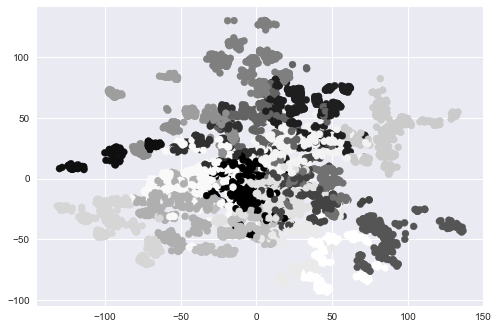

In [70]:
# Clustering with Euclidean Distance - K Means algorithm internally uses Euclidean distance for computing 
# the similarity. Hence we need not explicitly use the metric function above for running the algorithm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

columns_for_similarity = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'lotsizesquarefeet', 'yearbuilt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'price','population', 'income']

kmeans = KMeans(n_clusters=20)
zillow_data_cluster = zillow_min_max_normalisedd_df.sample(10000)
zillow_data_cluster_X = zillow_data_cluster[columns_for_similarity]
pca = PCA(n_components=2).fit(zillow_data_cluster_X)
pca_2d = pca.transform(zillow_data_cluster_X)
kmeans.fit(zillow_data_cluster_X)
pl.figure('K-means with 20 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
pl.show()


In [71]:
# merging two  datasets for xgboost
xgb_2016= pd.read_csv("xgb_submit_2016.csv", low_memory=False)
xgb_2017= pd.read_csv("xgb_submit_2017.csv", low_memory=False)



In [75]:
xgb_submit=pd.merge(xgb_2016,xgb_2017,on='ParcelId')

In [77]:
xgb_submit = xgb_submit[['ParcelId', '201610','201611','201612','201710','201711','201712']]
xgb_submit.to_csv("xgb_submit.gz", index=False, float_format='%.5f', compression='gzip')

In [78]:
xgb_2016['201710']=xgb_2016['201612']
xgb_2016['201711']=xgb_2016['201612']
xgb_2016['201712']=xgb_2016['201612']

In [80]:
xgb_2016.to_csv("xgb_submit_2016.gz", index=False, float_format='%.5f', compression='gzip')

In [ ]:
xgb_2017['201610']=xgb_2016['201710']
xgb_2017['201611']=xgb_2016['201710']
xgb_2017['201612']=xgb_2016['201710']